# RSA Demonstration

Import my RSA package into the environment

In [1]:
from RSA import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 20

Generate a set of RSA keys with appropriate bitsize

In [3]:
RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  10 bits found: 839
Checked 1 candidates in 0.00 s
Prime of  10 bits found: 719
Checked 3 candidates in 0.00 s

p: 839
q: 719

n: 603241
e: 135799
n bit length: 20
Private-Key, d: 410659
Public-Key: (603241, 135799)
Private-Key: 410659
n is 20 bits



True

### Brute Force Algorithm

In [4]:
bf = brute_force.BFSolver(RSA_keys.n, RSA_keys.e, True)   # pass it public keys, and True verbose flag
bf.solve()                                                # run solver

p: 719
q: 839
Private-Key, d: 410659
Numbers checked: 29
Time taken: 0.002 s


True

### Pollard's Rho Algorithm

In [5]:
rho = pollard_rho.RhoSolver(RSA_keys.n, RSA_keys.e, True)   # pass it public keys, and True verbose flag
rho.solve()                                                 # run solver

p: 839
q: 719
Private-Key, d: 410659
Numbers checked: 18
Time taken: 0.002 s


True

### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [6]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

- Blue = Brute Force
- Orange = Pollard's Rho

<IPython.core.display.Javascript object>


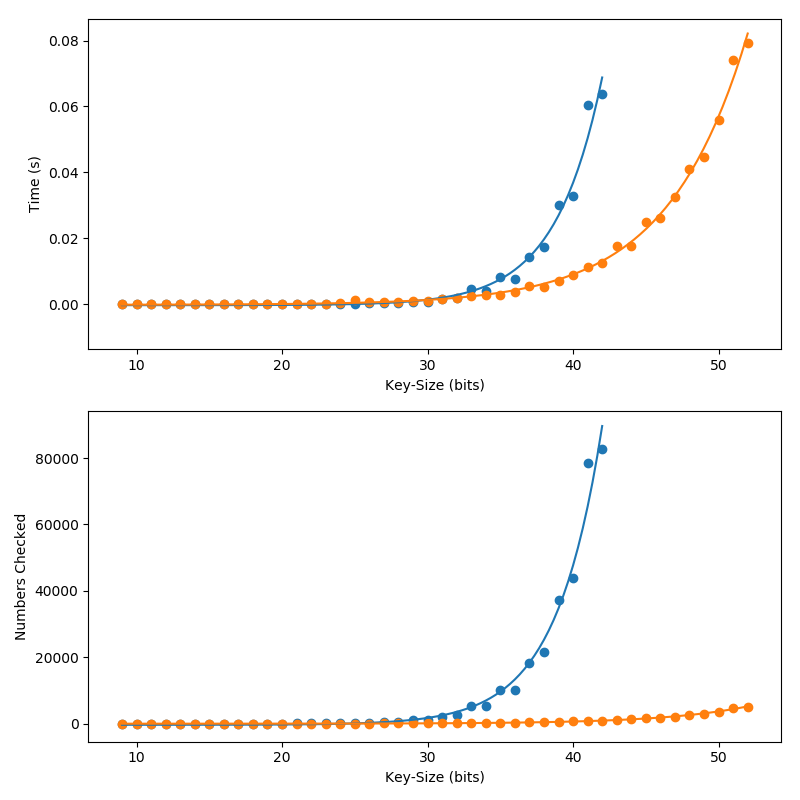

Press Enter to stop.


In [7]:
%matplotlib notebook
from graphs_RSA import *

minBit = 10
bf_bit = 44
rho_bit = 54

testGraphs(minBit, bf_bit, rho_bit)